In [1]:
import pandas as pd
train_df = pd.read_csv('quora_question_train.csv')
train_df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [2]:
# Calculate the number of rows with null values in new_train_df
null_rows_count = train_df.isnull().any(axis=1).sum()

# Print the number of rows with null values
print(f"Number of rows with null values: {null_rows_count}")

Number of rows with null values: 3


In [3]:
# Drop rows with null values
train_df_cleaned = train_df.dropna()

# Verify the changes
print(f"Shape of the cleaned DataFrame: {train_df_cleaned.shape}")
print(f"Number of rows with null values after cleaning: {train_df_cleaned.isnull().any(axis=1).sum()}")

Shape of the cleaned DataFrame: (404287, 6)
Number of rows with null values after cleaning: 0


In [4]:
# Get a sample set of data from the original DataFrame

# Sample 100,000 rows from the original DataFrame 'train_df' and store it in 'new_train_df'
# Set random_state to 42 for reproducibility
new_train_df = train_df_cleaned.sample(100000, random_state=42) # random_state=42

# Display the first few rows to verify the new columns
new_train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0
224279,224279,332326,332327,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...,0
252452,252452,336023,366789,Is Kellyanne Conway annoying in your opinion?,Did Kellyanne Conway really imply that we shou...,0
174039,174039,268330,268331,How do you rate (1-10) and review Maruti Baleno?,What career options does one have after comple...,0
384863,384863,28901,233483,What are some good books on marketing?,What are some of the best books ever written a...,1


In [5]:
new_train_df.dtypes

id               int64
qid1             int64
qid2             int64
question1       object
question2       object
is_duplicate     int64
dtype: object

In [6]:
new_train_df.describe()

,id,qid1,qid2,is_duplicate
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,201870.829400,217299.829590,221015.610300,0.368660
std,116666.064149,157370.339939,159616.758405,0.482444
min,2.000000,3.000000,6.000000,0.000000
25%,100755.250000,75117.000000,75155.000000,0.000000
50%,201490.500000,192679.000000,197213.500000,0.000000
75%,302691.500000,345483.250000,354024.250000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


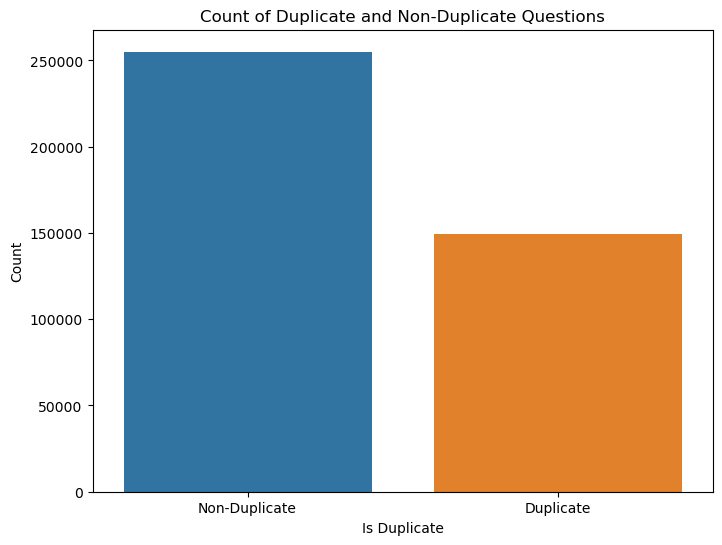

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of the is_duplicate feature
plt.figure(figsize=(8, 6))
sns.countplot(x='is_duplicate', data=new_train_df_cleaned)
plt.title('Distribution of Duplicate and Non-Duplicate Questions')
plt.xlabel('Is Duplicate')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Duplicate', 'Duplicate'])
plt.show()

In [7]:
import re
from bs4 import BeautifulSoup

### Re Package

Re is a package that can be used to work with regular expressions.

In our particular case, `re` will be used to substitute certain text with other text to make questions uniform.

**Example:**
```python
q = re.sub(r'([0-9]+)000000000', r'\1b', q)
```
The code above will make any number 0-9 followed by 9 zeros change from the numerical value to a word value, such as 7 billion.
<br>Resource: [Python Regex - W3Schools](https://www.w3schools.com/python/python_regex.asp)

### Beautiful Soup
Beautiful Soup is used to remove HTML tags, as they could make similar questions seem like they are not similar.
<br>Learn more here: [How to Use Beautiful Soup for Web Scraping with Python](https://brightdata.com/blog/how-tos/how-to-use-beautiful-soup-for-web-scraping-with-python)

### Preprocessing Function Overview

The `preprocess` function below parses through the data from the `new_train_df` and performs several transformations to prepare the data for further analysis.

**Steps performed by the `preprocess` function:**

1. Converts all questions to lowercase.
2. Replaces special characters, such as "$", with their string equivalents (e.g., "dollar").
3. Removes the word `[math]` and replaces numeric strings such as "1,000" with "1k", "1,000,000" with "1m", and so on, using the `re` package as explained above.
4. Converts contractions to their decontracted form (e.g., "ain't" to "am not").
5. Removes HTML tags and all punctuation.

**Example:**

Input string: "I ain't good at counting the 1,000,000! You wouldn't have any idea on how to help me, would you?"

Output String: "i am not good at counting the 1m you would not have any idea on how to help me would you"

In [8]:
def preprocess(text):
    """
    Preprocesses the input text by performing the following transformations:
    1. Converts text to lowercase.
    2. Replaces special characters with their string equivalents.
    3. Removes the word '[math]' and replaces numeric strings with their abbreviations.
    4. Expands contractions to their full forms.
    5. Removes HTML tags and punctuation.
    
    Parameters:
    text (str): The input text to preprocess.

    Returns:
    str: The preprocessed text.
    """

    # Convert text to lowercase and strip leading/trailing spaces
    text = str(text).lower().strip()
    
    # Replace special characters with string equivalents
    replacements = {
        '%': ' percent',
        '$': ' dollar',
        '₹': ' rupee',
        '€': ' euro',
        '@': ' at'
    }
    for char, replacement in replacements.items():
        text = text.replace(char, replacement)
    
    # Remove the word '[math]' and replace large numbers with abbreviations
    text = text.replace('[math]', '')
    text = text.replace(',000,000,000 ', 'b ')
    text = text.replace(',000,000 ', 'm ')
    text = text.replace(',000 ', 'k ')
    text = re.sub(r'([0-9]+)000000000', r'\1b', text)
    text = re.sub(r'([0-9]+)000000', r'\1m', text)
    text = re.sub(r'([0-9]+)000', r'\1k', text)
    
    # Dictionary of contractions and their expanded forms
    contractions = { 
        "ain't": "am not",
        "aren't": "are not",
        "can't": "cannot",
        "can't've": "cannot have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'd've": "he would have",
        "he'll": "he will",
        "he'll've": "he will have",
        "he's": "he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how is",
        "i'd": "i would",
        "i'd've": "i would have",
        "i'll": "i will",
        "i'll've": "i will have",
        "i'm": "i am",
        "i've": "i have",
        "isn't": "is not",
        "it'd": "it would",
        "it'd've": "it would have",
        "it'll": "it will",
        "it'll've": "it will have",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she would",
        "she'd've": "she would have",
        "she'll": "she will",
        "she'll've": "she will have",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so as",
        "that'd": "that would",
        "that'd've": "that would have",
        "that's": "that is",
        "there'd": "there would",
        "there'd've": "there would have",
        "there's": "there is",
        "they'd": "they would",
        "they'd've": "they would have",
        "they'll": "they will",
        "they'll've": "they will have",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what'll've": "what will have",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who'll've": "who will have",
        "who's": "who is",
        "who've": "who have",
        "why's": "why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you would",
        "you'd've": "you would have",
        "you'll": "you will",
        "you'll've": "you will have",
        "you're": "you are",
        "you've": "you have"
    }

    # Expand contractions
    text_decontracted = []
    for word in text.split():
        if word in contractions:
            word = contractions[word]
        text_decontracted.append(word)
    text = ' '.join(text_decontracted)

    # Further replace contraction suffixes
    text = text.replace("'ve", " have")
    text = text.replace("n't", " not")
    text = text.replace("'re", " are")
    text = text.replace("'ll", " will")
    
    # Remove HTML tags using BeautifulSoup
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # Remove punctuation
    text = re.sub(r'\W', ' ', text).strip()

    return text

In [9]:
# Example usage
example_text = "I ain't good at counting the 1,000,000! You wouldn't have any idea on how to help me, would you?"
processed_text = preprocess(example_text)
print(processed_text)

i am not good at counting the 1 000 000  you would not have any idea on how to help me  would you


In [10]:
# Run question1 and question2 through the preprocess function shown above
new_train_df['question1'] = new_train_df['question1'].apply(preprocess)
new_train_df['question2'] = new_train_df['question2'].apply(preprocess)
new_train_df.head()

C:\Users\RLAPTOP\AppData\Local\Temp\ipykernel_10244\2547882009.py:176: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


,id,qid1,qid2,question1,question2,is_duplicate
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0
224279,224279,332326,332327,will a breathing treatment help a cough,how can i help someone that is unconscious but...,0
252452,252452,336023,366789,is kellyanne conway annoying in your opinion,did kellyanne conway really imply that we shou...,0
174039,174039,268330,268331,how do you rate 1 10 and review maruti baleno,what career options does one have after comple...,0
384863,384863,28901,233483,what are some good books on marketing,what are some of the best books ever written a...,1


In [11]:
# Add columns for the length of questions

# Calculate the length of each question in the 'question1' column and store the result in a new column 'q1_length'
new_train_df['question1_length'] = new_train_df['question1'].str.len()

# Calculate the length of each question in the 'question2' column and store the result in a new column 'q2_length'
new_train_df['question2_length'] = new_train_df['question2'].str.len()

# Display the first few rows to verify the new columns
new_train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_length,question2_length
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33
224279,224279,332326,332327,will a breathing treatment help a cough,how can i help someone that is unconscious but...,0,39,62
252452,252452,336023,366789,is kellyanne conway annoying in your opinion,did kellyanne conway really imply that we shou...,0,44,117
174039,174039,268330,268331,how do you rate 1 10 and review maruti baleno,what career options does one have after comple...,0,47,126
384863,384863,28901,233483,what are some good books on marketing,what are some of the best books ever written a...,1,37,60


In [12]:
# Display a random sample of 5 rows from the DataFrame to verify the new columns
new_train_df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate,question1_length,question2_length
332273,332273,459252,459253,given kaine s support for tpp will his select...,question for guys that are extremely shy how ...,0,118,70
8234,8234,16060,16061,how can i switch off from work,what is a good way of switching off after work,0,30,46
131123,131123,121386,115864,how do i stop over thinking everything,how can i stop over thinking everything,1,38,39
356147,356147,485420,485421,is mba the ultimate degree,how many mba degrees can one have,0,26,33
162057,162057,252352,252353,how do you update the instagram location targe...,how can i find instagram users by location,0,50,42


In [13]:
# Add columns for the number of words for each question
new_train_df['q1_num_words'] = new_train_df['question1'].apply(lambda row: len(row.split(" ")))
new_train_df['q2_num_words'] = new_train_df['question2'].apply(lambda row: len(row.split(" ")))

# Display the first few rows to verify the new columns
new_train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_length,question2_length,q1_num_words,q2_num_words
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8
224279,224279,332326,332327,will a breathing treatment help a cough,how can i help someone that is unconscious but...,0,39,62,7,11
252452,252452,336023,366789,is kellyanne conway annoying in your opinion,did kellyanne conway really imply that we shou...,0,44,117,7,22
174039,174039,268330,268331,how do you rate 1 10 and review maruti baleno,what career options does one have after comple...,0,47,126,12,23
384863,384863,28901,233483,what are some good books on marketing,what are some of the best books ever written a...,1,37,60,7,11


In [14]:
# Display a random sample of 2 rows from the DataFrame to verify the new columns
new_train_df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate,question1_length,question2_length,q1_num_words,q2_num_words
26241,26241,48863,48864,are if i were and if i was both gram...,which one is grammatically correct,0,63,34,21,5
227880,227880,1109,116796,what is your favorite anime character and why,what is your favorite anime character,1,46,37,9,6
84671,84671,143125,143126,how much does a recruiter make a year in the uk,what is something cool that two people can do ...,0,47,57,11,12
404278,404278,537919,169786,how did you prepare for aiims neet aipmt,how did you prepare for the aiims ug entrance ...,0,40,51,8,10
75534,75534,17537,42620,what is the cheapest method to commit suicide,what is a sure way to commit suicide,1,45,36,8,8


In [15]:
def common_words(row):
    """
    Computes the number of common words between two questions in a DataFrame row.

    Parameters:
    row (pd.Series): A row of a DataFrame containing 'question1' and 'question2' columns.

    Returns:
    int: The number of common words between the two questions.
    """
    # Split the questions into words, convert to lowercase, and strip whitespace
    words_question1 = set(map(lambda word: word.lower().strip(), row['question1'].split()))
    words_question2 = set(map(lambda word: word.lower().strip(), row['question2'].split()))
    
    # Compute the intersection of the two sets to find common words
    common_word_count = len(words_question1 & words_question2)
    
    return common_word_count

In [16]:
# Add common words value to each row of the dataset

# Apply the common_words function to each row of the DataFrame and store the result in a new column 'word_common'
new_train_df['common_words'] = new_train_df.apply(common_words, axis=1)

# Display the first few rows to verify the new columns
new_train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_length,question2_length,q1_num_words,q2_num_words,common_words
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,7
224279,224279,332326,332327,will a breathing treatment help a cough,how can i help someone that is unconscious but...,0,39,62,7,11,2
252452,252452,336023,366789,is kellyanne conway annoying in your opinion,did kellyanne conway really imply that we shou...,0,44,117,7,22,2
174039,174039,268330,268331,how do you rate 1 10 and review maruti baleno,what career options does one have after comple...,0,47,126,12,23,0
384863,384863,28901,233483,what are some good books on marketing,what are some of the best books ever written a...,1,37,60,7,11,5


In [17]:
# Display a random sample of 5 rows from the DataFrame to verify the new columns
new_train_df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate,question1_length,question2_length,q1_num_words,q2_num_words,common_words
383068,383068,514978,514979,who invented the paperclip,when were paperclips invented,0,26,29,4,4,1
243419,243419,354658,345449,what is your worst breakup experience,what was your worst breakup,1,37,27,6,5,4
234044,234044,97842,122495,how can i treat an earlobe cyst,how can you treat a cyst on the earlobe,1,31,39,7,9,5
24567,24567,40917,7166,how do i get rid of acne and acne causes,what is the best way to get rid of acne,1,40,39,10,10,4
167844,167844,260119,260120,how do i make a secure ajax call,how do i make ajax calls secure,1,32,31,8,7,6


In [18]:
def total_words(row):
    """
    Computes the total number of unique words in both questions in a DataFrame row.

    Parameters:
    row (pd.Series): A row of a DataFrame containing 'question1' and 'question2' columns.

    Returns:
    int: The total number of unique words in both questions combined.
    """
    # Split the questions into words, convert to lowercase, and strip whitespace
    words_question1 = set(map(lambda word: word.lower().strip(), row['question1'].split()))
    words_question2 = set(map(lambda word: word.lower().strip(), row['question2'].split()))
    
    # Calculate the total number of unique words in both questions
    total_word_count = len(words_question1) + len(words_question2)
    
    return total_word_count

In [19]:
# Apply the function to each row of the DataFrame and store the result in a new column
new_train_df['total_words'] = new_train_df.apply(total_words, axis=1)

# Display the first few rows to verify the new column
new_train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_length,question2_length,q1_num_words,q2_num_words,common_words,total_words
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,7,16
224279,224279,332326,332327,will a breathing treatment help a cough,how can i help someone that is unconscious but...,0,39,62,7,11,2,17
252452,252452,336023,366789,is kellyanne conway annoying in your opinion,did kellyanne conway really imply that we shou...,0,44,117,7,22,2,28
174039,174039,268330,268331,how do you rate 1 10 and review maruti baleno,what career options does one have after comple...,0,47,126,12,23,0,29
384863,384863,28901,233483,what are some good books on marketing,what are some of the best books ever written a...,1,37,60,7,11,5,18


In [20]:
# Display a random sample of 5 rows from the DataFrame to verify the new column
new_train_df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate,question1_length,question2_length,q1_num_words,q2_num_words,common_words,total_words
55637,55637,98064,98065,can hormonal imbalance lead to weight gain,does masturbation leads to weight gain,0,42,38,7,6,3,13
29912,29912,55296,55297,how should i cut a hookup relationship off,how can i cut off a friend who is temporarily ...,0,42,60,8,13,5,21
373808,373808,193711,34407,has quora turned into a political hack for cli...,why does it seem quora is so pro clinton,1,50,40,9,9,2,18
278262,278262,37372,397504,can you schedule an uber ahead of time how do...,do you have a set schedule devoted to family time,0,96,49,23,10,5,27
394214,394214,527104,527105,how should i set my career goal,how can i determine my career goals,0,31,35,7,7,4,14


In [21]:
# Add a column for the percentage of shared words

# Calculate the shared words ratio by dividing the number of common words by the total number of words
# Round the result to two decimal places for better readability
new_train_df['shared_words_ratio'] = round(new_train_df['common_words'] / new_train_df['total_words'], 2)

# Display the first few rows to verify the new column
new_train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_length,question2_length,q1_num_words,q2_num_words,common_words,total_words,shared_words_ratio
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,7,16,0.44
224279,224279,332326,332327,will a breathing treatment help a cough,how can i help someone that is unconscious but...,0,39,62,7,11,2,17,0.12
252452,252452,336023,366789,is kellyanne conway annoying in your opinion,did kellyanne conway really imply that we shou...,0,44,117,7,22,2,28,0.07
174039,174039,268330,268331,how do you rate 1 10 and review maruti baleno,what career options does one have after comple...,0,47,126,12,23,0,29,0.00
384863,384863,28901,233483,what are some good books on marketing,what are some of the best books ever written a...,1,37,60,7,11,5,18,0.28


In [22]:
# Display a random sample of 5 rows from the DataFrame to verify the new column
new_train_df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate,question1_length,question2_length,q1_num_words,q2_num_words,common_words,total_words,shared_words_ratio
169573,169573,25055,39025,what are prons and cons of banning and replaci...,what are the pros and cons of banning 500 and ...,1,84,69,15,15,9,27,0.33
298679,298679,219900,421207,how can i overcome 214 b denial for us f1 visa,i have been rejected for f1 visa two times bas...,0,48,140,13,32,6,37,0.16
164575,164575,207455,255697,why does the sun rise from the east,why does the sun rise from the northeast inst...,0,35,62,8,12,6,17,0.35
52469,52469,92892,75153,how could i get lease car deals,what is the best way to get a good deal in a c...,1,31,54,7,14,3,20,0.15
170873,170873,264146,264147,how do i say we look forward working with you,are you looking forward to working,0,45,34,10,6,3,16,0.19


### NLTK (Natural Language Toolkit)

NLTK is a suite of libraries and programs for Natural Language Processing (NLP).

NLTK has many great features. In this project, I will use it for the stop words that the library provides. A stop word is a commonly used word such as "a", "an", "in", and so on. Learn more here: [Removing Stop Words with NLTK in Python](https://www.geeksforgeeks.org/removing-stop-words-nltk-python/)

The goal in the function below is to tokenize each sentence and separate the non-stopwords from the stopwords. We will then find the number of common non-stopwords, common stopwords, and the total number of common tokens. These variables will be used in `token_features`, which will be expanded upon below.

In [23]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords from NLTK
#nltk.download('stopwords')

def fetch_token_features(row):
    """
    Extracts token-based features from two questions in a DataFrame row.

    Parameters:
    row (pd.Series): A row of a DataFrame containing 'question1' and 'question2' columns.

    Returns:
    list: A list of token-based features.
    """
    
    question1 = row['question1']
    question2 = row['question2']
    
    SAFE_DIV = 0.0001  # Safety division constant to avoid division by zero
    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0] * 8  # Initialize a list to hold the token features
    
    # Tokenize the questions
    question1_tokens = question1.split()
    question2_tokens = question2.split()
    
    # Return the initial features if either question is empty
    if len(question1_tokens) == 0 or len(question2_tokens) == 0:
        return token_features

    # Extract non-stop words
    question1_words = set([word for word in question1_tokens if word not in STOP_WORDS])
    question2_words = set([word for word in question2_tokens if word not in STOP_WORDS])
    
    # Extract stop words
    question1_stops = set([word for word in question1_tokens if word in STOP_WORDS])
    question2_stops = set([word for word in question2_tokens if word in STOP_WORDS])
    
    # Calculate common non-stop words
    common_word_count = len(question1_words.intersection(question2_words))
    
    # Calculate common stop words
    common_stop_count = len(question1_stops.intersection(question2_stops))
    
    # Calculate total common tokens
    common_token_count = len(set(question1_tokens).intersection(set(question2_tokens)))
    
    # Calculate token-based features
    token_features[0] = common_word_count / (min(len(question1_words), len(question2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(question1_words), len(question2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(question1_stops), len(question2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(question1_stops), len(question2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(question1_tokens), len(question2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(question1_tokens), len(question2_tokens)) + SAFE_DIV)
    
    # Check if the last words of both questions are the same
    token_features[6] = int(question1_tokens[-1] == question2_tokens[-1])
    
    # Check if the first words of both questions are the same
    token_features[7] = int(question1_tokens[0] == question2_tokens[0])
    
    return token_features

### Token Features

- **cwc_min**: This is the ratio of the number of common words to the length of the smaller question.
- **cwc_max**: This is the ratio of the number of common words to the length of the larger question.
- **csc_min**: This is the ratio of the number of common stop words to the smaller stop word count among the two questions.
- **csc_max**: This is the ratio of the number of common stop words to the larger stop word count among the two questions.
- **ctc_min**: This is the ratio of the number of common tokens to the smaller token count among the two questions.
- **ctc_max**: This is the ratio of the number of common tokens to the larger token count among the two questions.
- **last_word_eq**: 1 if the last word in the two questions is the same, 0 otherwise.
- **first_word_eq**: 1 if the first word in the two questions is the same, 0 otherwise.

### Length-Based Features

- **mean_len**: Mean of the length of the two questions (number of words).
- **abs_len_diff**: Absolute difference between the length of the two questions (number of words).
- **longest_substr_ratio**: Ratio of the length of the longest substring among the two questions to the length of the smaller question.

### Fuzzy Features

- **fuzz_ratio**: `fuzz_ratio` score from the `fuzzywuzzy` library.
- **fuzz_partial_ratio**: `fuzz_partial_ratio` score from the `fuzzywuzzy` library.
- **token_sort_ratio**: `token_sort_ratio` score from the `fuzzywuzzy` library.
- **token_set_ratio**: `token_set_ratio` score from the `fuzzywuzzy` library.


In [24]:
# Apply the fetch_token_features function to each row of the DataFrame
token_features = new_train_df.apply(fetch_token_features, axis=1)

# Extract each token feature and add it as a new column in the DataFrame
new_train_df["cwc_min"] = list(map(lambda x: x[0], token_features))
new_train_df["cwc_max"] = list(map(lambda x: x[1], token_features))
new_train_df["csc_min"] = list(map(lambda x: x[2], token_features))
new_train_df["csc_max"] = list(map(lambda x: x[3], token_features))
new_train_df["ctc_min"] = list(map(lambda x: x[4], token_features))
new_train_df["ctc_max"] = list(map(lambda x: x[5], token_features))
new_train_df["last_word_eq"] = list(map(lambda x: x[6], token_features))
new_train_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

# Display the first few rows to verify the new columns
new_train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_length,question2_length,q1_num_words,q2_num_words,...,total_words,shared_words_ratio,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,...,16,0.44,0.749981,0.749981,0.999975,0.999975,0.874989,0.874989,0.0,1.0
224279,224279,332326,332327,will a breathing treatment help a cough,how can i help someone that is unconscious but...,0,39,62,7,11,...,17,0.12,0.499988,0.399992,0.000000,0.000000,0.285710,0.181817,0.0,0.0
252452,252452,336023,366789,is kellyanne conway annoying in your opinion,did kellyanne conway really imply that we shou...,0,44,117,7,22,...,28,0.07,0.499988,0.181817,0.000000,0.000000,0.285710,0.090909,0.0,0.0
174039,174039,268330,268331,how do you rate 1 10 and review maruti baleno,what career options does one have after comple...,0,47,126,12,23,...,29,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
384863,384863,28901,233483,what are some good books on marketing,what are some of the best books ever written a...,1,37,60,7,11,...,18,0.28,0.666644,0.399992,0.749981,0.499992,0.714276,0.454541,1.0,1.0


### Distance Package

The Distance package is used to aid in finding the similarities between words and strings. This can be particularly useful for tasks such as identifying similar questions or matching text patterns.
<br>Learn more here: [Distance - PyPI](https://pypi.org/project/Distance/)

In [25]:
!pip install distance

In [26]:
import distance

def fetch_length_features(row):
    """
    Extracts length-based features from two questions in a DataFrame row.

    Parameters:
    row (pd.Series): A row of a DataFrame containing 'question1' and 'question2' columns.

    Returns:
    list: A list of length-based features.
    """
    
    question1 = row['question1']
    question2 = row['question2']
    
    length_features = [0.0] * 3  # Initialize a list to hold the length features
    
    # Convert the sentences into tokens
    question1_tokens = question1.split()
    question2_tokens = question2.split()
    
    # Return the initial features if either question is empty
    if len(question1_tokens) == 0 or len(question2_tokens) == 0:
        return length_features
    
    # Calculate the absolute difference in length between the two questions
    length_features[0] = abs(len(question1_tokens) - len(question2_tokens))
    
    # Calculate the average token length of the two questions
    length_features[1] = (len(question1_tokens) + len(question2_tokens)) / 2
    
    # Calculate the ratio of the length of the longest common substring to the length of the shorter question
    longest_common_substrings = list(distance.lcsubstrings(question1, question2))
    if longest_common_substrings:
        length_features[2] = len(longest_common_substrings[0]) / (min(len(question1), len(question2)) + 1)
    
    return length_features

In [27]:
# Apply the fetch_length_features function to each row of the DataFrame
length_features = new_train_df.apply(fetch_length_features, axis=1)

# Extract each length feature and add it as a new column in the DataFrame
new_train_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_train_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_train_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

# Display the first few rows to verify the new columns
new_train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_length,question2_length,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,...,0.749981,0.999975,0.999975,0.874989,0.874989,0.0,1.0,0.0,8.0,0.823529
224279,224279,332326,332327,will a breathing treatment help a cough,how can i help someone that is unconscious but...,0,39,62,7,11,...,0.399992,0.000000,0.000000,0.285710,0.181817,0.0,0.0,4.0,9.0,0.250000
252452,252452,336023,366789,is kellyanne conway annoying in your opinion,did kellyanne conway really imply that we shou...,0,44,117,7,22,...,0.181817,0.000000,0.000000,0.285710,0.090909,0.0,0.0,15.0,14.5,0.400000
174039,174039,268330,268331,how do you rate 1 10 and review maruti baleno,what career options does one have after comple...,0,47,126,12,23,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,11.0,15.5,0.062500
384863,384863,28901,233483,what are some good books on marketing,what are some of the best books ever written a...,1,37,60,7,11,...,0.399992,0.749981,0.499992,0.714276,0.454541,1.0,1.0,4.0,9.0,0.368421


### Fuzzy Wuzzy

Fuzzy Wuzzy is a Python library. The core function of the library is to calculate the Levenshtein Distance between two strings.

We will be using four very useful features of the library:

1. **Fuzz Ratio**: This calculates the similarity ratio between two strings. It includes punctuation and other characters in the ratio, which is why we remove them beforehand, as they do not contribute to the meaningful content of a question.
2. **Partial Ratio**: This compares the shortest string with all possible substrings of the same length in the longer string.
3. **Token Sort Ratio**: This ignores the order of words and focuses on the words present in the strings. It sorts the tokens (words) alphabetically and then calculates the Fuzz Ratio.
4. **Token Set Ratio**: This ignores duplicate words and focuses on unique words present in the strings. It calculates the similarity ratio based on the set of tokens (words) in the strings.

In [28]:
!pip install fuzzywuzzy

In [29]:
!pip install python-Levenshtein

In [30]:
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    """
    Extracts fuzzy matching features from two questions in a DataFrame row.

    Parameters:
    row (pd.Series): A row of a DataFrame containing 'question1' and 'question2' columns.

    Returns:
    list: A list of fuzzy matching features.
    """
    
    question1 = row['question1']
    question2 = row['question2']
    
    fuzzy_features = [0.0] * 4  # Initialize a list to hold the fuzzy matching features
    
    # Calculate Fuzz Ratio
    fuzzy_features[0] = fuzz.QRatio(question1, question2)

    # Calculate Partial Ratio
    fuzzy_features[1] = fuzz.partial_ratio(question1, question2)

    # Calculate Token Sort Ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(question1, question2)

    # Calculate Token Set Ratio
    fuzzy_features[3] = fuzz.token_set_ratio(question1, question2)
    
    return fuzzy_features

In [31]:
# Apply the fetch_fuzzy_features function to each row of the DataFrame
fuzzy_features = new_train_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_train_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_train_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_train_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_train_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

# Display the first few rows to verify the new columns
new_train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_length,question2_length,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,...,0.874989,0.0,1.0,0.0,8.0,0.823529,88,88,81,90
224279,224279,332326,332327,will a breathing treatment help a cough,how can i help someone that is unconscious but...,0,39,62,7,11,...,0.181817,0.0,0.0,4.0,9.0,0.250000,36,44,48,55
252452,252452,336023,366789,is kellyanne conway annoying in your opinion,did kellyanne conway really imply that we shou...,0,44,117,7,22,...,0.090909,0.0,0.0,15.0,14.5,0.400000,41,59,43,53
174039,174039,268330,268331,how do you rate 1 10 and review maruti baleno,what career options does one have after comple...,0,47,126,12,23,...,0.000000,0.0,0.0,11.0,15.5,0.062500,34,45,32,33
384863,384863,28901,233483,what are some good books on marketing,what are some of the best books ever written a...,1,37,60,7,11,...,0.454541,1.0,1.0,4.0,9.0,0.368421,68,62,66,88


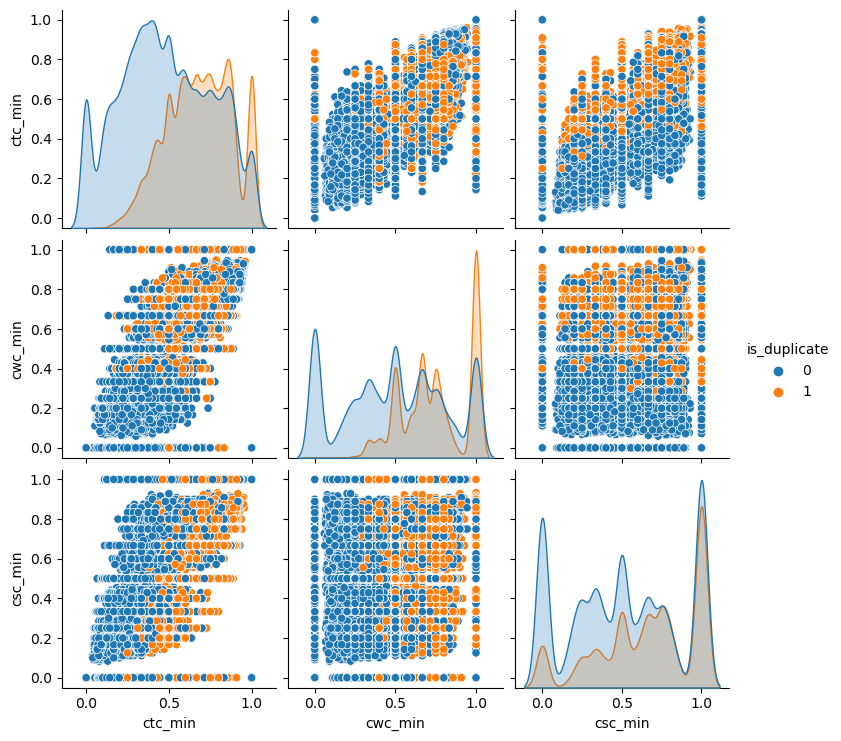

In [32]:
# Create a pair plot to visualize relationships between the features and the target variable
sns.pairplot(new_train_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']], hue='is_duplicate')

# Display the plot
plt.show()

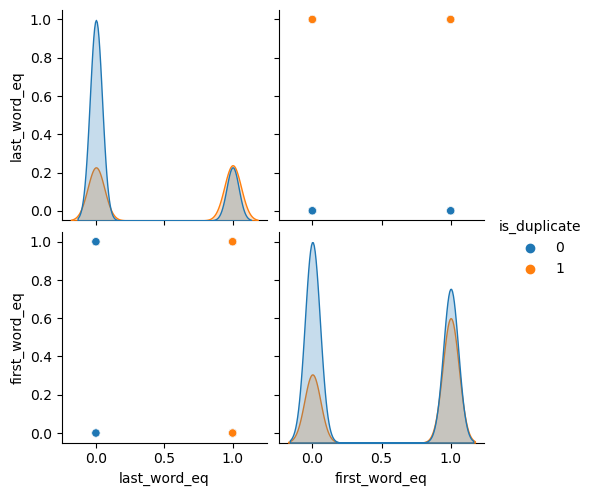

In [33]:
# Create a pair plot to visualize relationships between the features and the target variable
sns.pairplot(new_train_df[['last_word_eq', 'first_word_eq', 'is_duplicate']], hue='is_duplicate')

# Display the plot
plt.show()

In [34]:
# Create a DataFrame that only includes the question columns
questions_df = new_train_df[['question1', 'question2']]

# Display the first few rows to verify the new columns
questions_df.head()

,question1,question2
8067,how do i play pokémon go in korea,how do i play pokémon go in china
224279,will a breathing treatment help a cough,how can i help someone that is unconscious but...
252452,is kellyanne conway annoying in your opinion,did kellyanne conway really imply that we shou...
174039,how do you rate 1 10 and review maruti baleno,what career options does one have after comple...
384863,what are some good books on marketing,what are some of the best books ever written a...


In [35]:
# Create the final dataset by dropping unnecessary columns
final_features_df = new_train_df.drop(columns=['id', 'qid1', 'qid2', 'question1', 'question2'])

# Display the first few rows to verify the remaining columns
final_features_df.head()

,is_duplicate,question1_length,question2_length,q1_num_words,q2_num_words,common_words,total_words,shared_words_ratio,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
8067,0,33,33,8,8,7,16,0.44,0.749981,0.749981,...,0.874989,0.0,1.0,0.0,8.0,0.823529,88,88,81,90
224279,0,39,62,7,11,2,17,0.12,0.499988,0.399992,...,0.181817,0.0,0.0,4.0,9.0,0.250000,36,44,48,55
252452,0,44,117,7,22,2,28,0.07,0.499988,0.181817,...,0.090909,0.0,0.0,15.0,14.5,0.400000,41,59,43,53
174039,0,47,126,12,23,0,29,0.00,0.000000,0.000000,...,0.000000,0.0,0.0,11.0,15.5,0.062500,34,45,32,33
384863,1,37,60,7,11,5,18,0.28,0.666644,0.399992,...,0.454541,1.0,1.0,4.0,9.0,0.368421,68,62,66,88


### CountVectorizer Explanation

The `CountVectorizer` is a tool provided by the `sklearn.feature_extraction.text` module in the `scikit-learn` library. It is used to convert a collection of text documents to a matrix of token counts. This is a crucial step in the preprocessing of textual data for machine learning models, as it transforms the text into numerical data that can be used for analysis.

The `CountVectorizer` works by:
1. **Tokenizing**: Splitting the text into individual words (tokens).
2. **Building a Vocabulary**: Creating a vocabulary of all the unique words in the corpus.
3. **Encoding**: Transforming each text document into a vector of word counts, where each element in the vector represents the count of a word from the vocabulary in the document.

In the code below, we use `CountVectorizer` to process questions from two columns in a DataFrame. We combine the texts from both columns, fit the vectorizer, and then transform the texts into arrays of token counts. Finally, we split these arrays back into separate arrays for each original column.

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Merge texts from both question columns into a single list
all_questions = list(questions_df['question1']) + list(questions_df['question2'])

# Initialize CountVectorizer with a maximum of 3000 features
count_vectorizer = CountVectorizer(max_features=3000)

# Fit the vectorizer to the combined questions and transform them into arrays
question_arrays = count_vectorizer.fit_transform(all_questions).toarray()

# Split the arrays back into two separate arrays for question1 and question2
q1_array, q2_array = np.vsplit(question_arrays, 2)

# Display the shapes of the resulting arrays to verify
print("Shape of q1_array:", q1_array.shape)
print("Shape of q2_array:", q2_array.shape)

Shape of q1_array: (100000, 3000)
Shape of q2_array: (100000, 3000)


In [37]:
# Convert the q1_array and q2_array into DataFrames with the same index as the original questions DataFrame
question1_df = pd.DataFrame(q1_array, index=questions_df.index)
question2_df = pd.DataFrame(q2_array, index=questions_df.index)

# Concatenate the two DataFrames along the columns
combined_questions_df = pd.concat([question1_df, question2_df], axis=1)

# Print the shape of the combined DataFrame to verify the dimensions
print(combined_questions_df.shape)

# Display the first few rows of the combined DataFrame to verify the content
combined_questions_df.head()

(100000, 6000)


,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
8067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
224279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
252452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174039,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
384863,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Concatenate the final_features_df DataFrame with the combined_questions_df DataFrame along the columns
final_combined_df = pd.concat([final_features_df, combined_questions_df], axis=1)

# Print the shape of the final combined DataFrame to verify the dimensions
print(final_combined_df.shape)

# Display the first few rows of the final combined DataFrame to verify the content
final_combined_df.head()

(100000, 6023)


,is_duplicate,question1_length,question2_length,q1_num_words,q2_num_words,common_words,total_words,shared_words_ratio,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
8067,0,33,33,8,8,7,16,0.44,0.749981,0.749981,...,0,0,0,0,0,0,0,0,0,0
224279,0,39,62,7,11,2,17,0.12,0.499988,0.399992,...,0,0,0,0,0,0,0,0,0,0
252452,0,44,117,7,22,2,28,0.07,0.499988,0.181817,...,0,0,0,0,0,0,0,0,0,0
174039,0,47,126,12,23,0,29,0.00,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
384863,1,37,60,7,11,5,18,0.28,0.666644,0.399992,...,0,0,0,0,0,0,0,0,0,0


In [39]:
from sklearn.model_selection import train_test_split

# Split the final_combined_df DataFrame into features (X) and target (y)
X = final_combined_df.iloc[:, 1:].values  # Features: all columns except the first one
y = final_combined_df.iloc[:, 0].values   # Target: the first column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Print the shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (80000, 6022)
X_test shape: (20000, 6022)
y_train shape: (80000,)
y_test shape: (20000,)


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the RandomForestClassifier
random_forest = RandomForestClassifier()

# Fit the model on the training data
random_forest.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = random_forest.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy of the Random Forest model:", accuracy)

Accuracy of the Random Forest model: 0.805


In [41]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for the Random Forest model
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix for the Random Forest model:")
print(conf_matrix)

Confusion Matrix for the Random Forest model:
[[10848  1723]
 [ 2177  5252]]


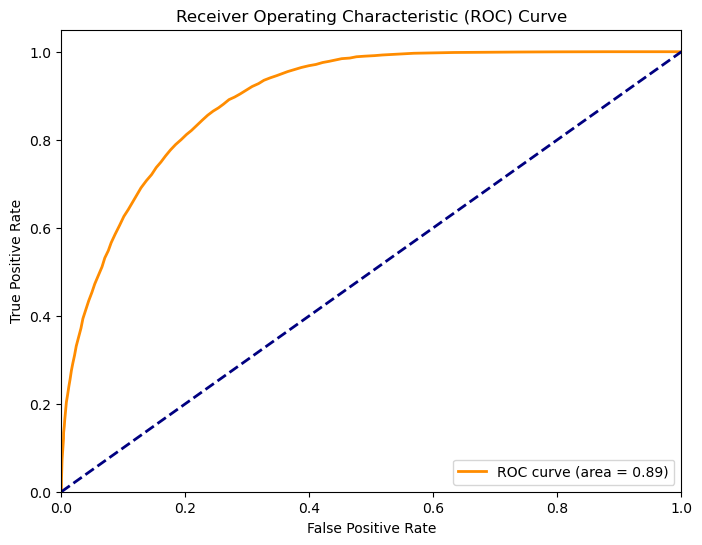

In [45]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, random_forest.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

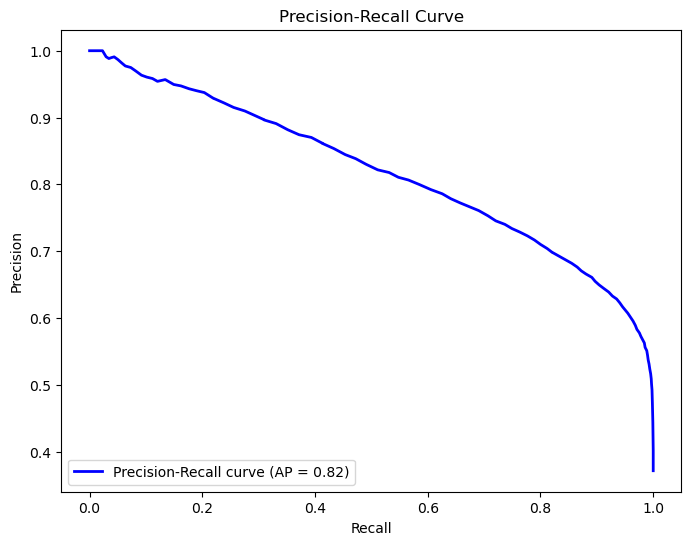

In [46]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate the precision-recall curve and average precision score
precision, recall, _ = precision_recall_curve(y_test, random_forest.predict_proba(X_test)[:, 1])
average_precision = average_precision_score(y_test, random_forest.predict_proba(X_test)[:, 1])

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


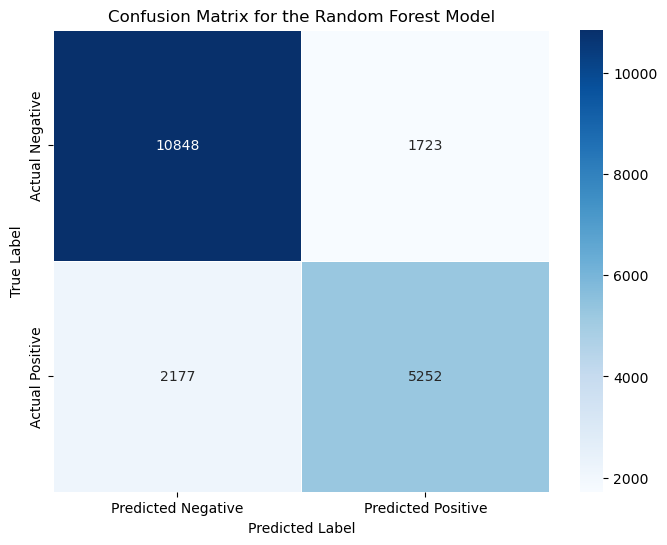

In [47]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix for the Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()